<a href="https://colab.research.google.com/github/lanjudkarrenuka/workshop/blob/main/pandas_advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ipl = pd.read_csv(r'/content/ipl-matches.csv')
# ipl = pd.read_csv(r'/content/ipl-matches.csv',index_col='ID')
ipl.sample(2)
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [ ]:
ipl.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [ ]:
# find all the final winners
mask = ipl['MatchNumber'] == 'Final'
new_df = ipl[mask]
new_df[['Season','WinningTeam']]

ipl[ipl['MatchNumber'] == 'Final'][['Season','WinningTeam']]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


In [ ]:
# how many super over finishes have occured
ipl[ipl['SuperOver'] == 'Y'].shape[0]

14

In [ ]:
 #how many matches has csk won in Kolkata
ipl[(ipl['City'] == 'Kolkata') & (ipl['WinningTeam'] == 'Chennai Super Kings')].shape[0]

5

In [ ]:
# Toss winner is match winner in percentage
(ipl[ipl['TossWinner'] == ipl['WinningTeam']].shape[0]/ipl.shape[0])*100


51.473684210526315

In [ ]:
 def head_to_head_record(df, team_a, team_b):
    mask = ((df['Team1'] == team_a) & (df['Team2'] == team_b)) | ((df['Team1'] == team_b) & (df['Team2'] == team_a))
    matches = df[mask]

    team_a_wins = (matches['WinningTeam'] == team_a).sum()
    team_b_wins = (matches['WinningTeam'] == team_b).sum()
    total_matches = len(matches)

    return {'Total Matches': total_matches,
            f'{team_a} Wins': team_a_wins,
            f'{team_b} Wins': team_b_wins
           }

head_to_head_record(ipl, 'Kochi Tuskers Kerala', 'Deccan Chargers')


{'Total Matches': 1,
 'Kochi Tuskers Kerala Wins': np.int64(0),
 'Deccan Chargers Wins': np.int64(1)}

In [ ]:
def head_to_head_record(df, team_a, team_b):
    mask = ((df['Team1'] == team_a) & (df['Team2'] == team_b)) | ((df['Team1'] == team_b) & (df['Team2'] == team_a))
    """
    Possibilites Chennai can play in Mumbai and Mumbai can play in Chennai -->

    Sometimes Mumbai can be Host team(TeamA) and Chennai can be Guest Team(TeamB)
    OR
    Sometimes Chennai can be Host team(TeamA) and Mumbai can be Guest Team(TeamB)

    And we need only this matches which are played between these two teams

    """
    matches = df[mask]

    team_a_wins = (matches['WinningTeam'] == team_a).sum()
    team_b_wins = (matches['WinningTeam'] == team_b).sum()
    total_matches = len(matches)

    return {'Total Matches': total_matches,
            f'{team_a} Wins': team_a_wins,
            f'{team_b} Wins': team_b_wins
           }

head_to_head_record(ipl,'Kohli Tushers Kerala','Deccan Chargers')

{'Total Matches': 0,
 'Kohli Tushers Kerala Wins': np.int64(0),
 'Deccan Chargers Wins': np.int64(0)}

In [ ]:
movies = pd.read_csv(r'/content/movies.csv')
movies.sample(4)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1406,3 Deewarein,tt0338490,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/3_Deewarein,Three Walls,3 Deewarein,0,2003,115,Crime|Drama,7.9,2029,Reporter Chandrika wants to film a documentar...,The story of a documentary movie-maker who fil...,NaN,Naseeruddin Shah|Jackie Shroff|Juhi Chawla|Nag...,2 wins & 9 nominations,1 August 2003 (India)
284,The Blueberry Hunt,tt2009592,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Blueberry_Hunt,The Blueberry Hunt,The Blueberry Hunt,0,2016,110,Action|Thriller,5.7,186,"The film centers on a recluse known as ""Colone...","The film centers on a recluse known as ""Colone...",NaN,Kartik Elangovan|Vinay Forrt|Aahana Kumra|P.T....,NaN,8 April 2016 (India)
1223,Black (2005 film),tt0375611,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Black_(2005_film),Black,Black,0,2005,122,Drama,8.2,31658,Based in Simla the McNallys are an Anglo-Indi...,The cathartic tale of a young woman who can't ...,An unending darkness... A world of shadows... ...,Amitabh Bachchan|Rani Mukerji|Shernaz Patel|Ay...,44 wins & 4 nominations,4 February 2005 (USA)
1578,Aks (2001 film),tt0289845,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aks_(2001_film),Aks,Aks,0,2001,184,Action|Crime|Horror,5.9,1518,Aks is the story of a hunter and his prey. A c...,Raghavan Ghatge a psychotic terrorist and Ma...,There is a stranger in your mirror,Amitabh Bachchan|Raveena Tandon|Manoj Bajpayee...,9 wins & 14 nominations,13 July 2001 (India)


In [ ]:
# Action movies with rating higher than 7.5
# mask1 = movies['genres'].str.split('|').apply(lambda x:'Action' in x)
condition_1 = movies['genres'].str.contains('Action')
condition_2 = movies['imdb_rating'] > 7.5

movies[condition_1 & condition_2]
len(movies[condition_1 & condition_2])

33

In [ ]:
# completely new
movies['Country'] = 'India'
movies.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA),India
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA),India
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India),India


In [ ]:
movies.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date', 'Country'],
      dtype='object')

In [ ]:
movies.drop('Country', axis=1, inplace=True) # axis in Numpy


In [ ]:
movies.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

In [ ]:
playoff_matches = ipl[~ipl['MatchNumber'].str.isdigit()]
potm_in_playoffs = playoff_matches['Player_of_Match']
potm_in_playoffs.value_counts()

,count
Player_of_Match,
F du Plessis,3
SK Raina,3
KA Pollard,3
JJ Bumrah,2
AB de Villiers,2
MK Pandey,2
M Vijay,2
A Kumble,2
YK Pathan,2


In [ ]:
# You have to find POTM in League matches
# League matches are the matches which are not playoffs

In [ ]:
# Toss decision plot

<Axes: ylabel='count'>

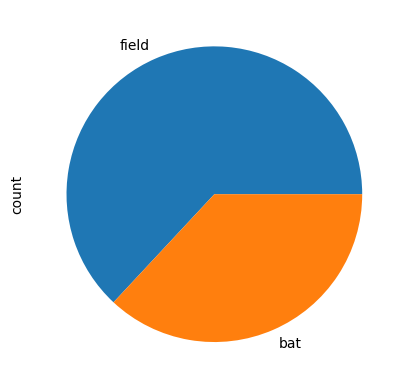

In [ ]:
# Toss decision plot
ipl['TossDecision'].value_counts().plot(kind='pie')

In [ ]:
ipl['Team2'].value_counts()

,count
Team2,
Mumbai Indians,119
Kolkata Knight Riders,118
Rajasthan Royals,103
Royal Challengers Bangalore,100
Kings XI Punjab,98
Chennai Super Kings,97
Sunrisers Hyderabad,83
Delhi Daredevils,76
Deccan Chargers,36


In [ ]:
ipl['Team1'].value_counts()

,count
Team1,
Royal Challengers Bangalore,126
Mumbai Indians,112
Chennai Super Kings,111
Kolkata Knight Riders,105
Kings XI Punjab,92
Rajasthan Royals,89
Delhi Daredevils,85
Sunrisers Hyderabad,69
Deccan Chargers,39


In [ ]:
# how many matches each team has played
(ipl['Team2'].value_counts() + ipl['Team1'].value_counts()).sort_values(ascending=False)

,count
Mumbai Indians,231
Royal Challengers Bangalore,226
Kolkata Knight Riders,223
Chennai Super Kings,208
Rajasthan Royals,192
Kings XI Punjab,190
Delhi Daredevils,161
Sunrisers Hyderabad,152
Deccan Chargers,75
Delhi Capitals,63


In [ ]:
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [ ]:
# ['B1', 'A0', 'D2', 'C1', 'A1', 'B0', 'C2', 'D0', 'B2', 'C0', 'D1', 'A2']
movies.sort_values(['year_of_release','title_x'],ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,Article 15 (film),tt10324144,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Article_15_(film),Article 15,Article 15,0,2019,130,Crime|Drama,8.3,13417,In the rural heartlands of India an upright p...,In the rural heartlands of India an upright p...,Farq Bahut Kar Liya| Ab Farq Laayenge.,Ayushmann Khurrana|Nassar|Manoj Pahwa|Kumud Mi...,1 win,28 June 2019 (USA)
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)


In [ ]:
courses = pd.read_csv('/content/courses.csv',index_col='course_id')
students = pd.read_csv('/content/students.csv',index_col='student_id')
nov = pd.read_csv('/content/reg-month1.csv')
dec = pd.read_csv('/content/reg-month2.csv')
matches = pd.read_csv('/content/matches.csv',index_col='id')
delivery = pd.read_csv('/content/deliveries.csv')

In [ ]:
delivery.sample(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
126880,535,1,Delhi Daredevils,Kolkata Knight Riders,1,7,MA Agarwal,SS Iyer,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
110372,466,1,Kings XI Punjab,Sunrisers Hyderabad,10,4,GJ Maxwell,CA Pujara,KV Sharma,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
students.sample(2)

,name,partner
student_id,,
7,Tarun Thaker,9
14,Pranab Natarajan,22


In [ ]:
nov.sample(2)

,student_id,course_id
2,18,6
9,15,1


In [ ]:
courses.sample(6)

,course_name,price
course_id,,
9,plotly,699
5,tableau,2499
11,Numpy,699
10,pyspark,2499
3,data analysis,4999
2,sql,3499


In [ ]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
regs = pd.concat([nov,dec])
#regs = pd.concat([nov,dec],ignore_index=True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [37]:
# regs2 = nov.append(dec,ignore_index=True)
# regs2

# NOTE : append() method for pandas DataFrame is deprecated from pandas v2.0 onwards.

In [38]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])
multi
# Multiindex DataFrame
# multi.loc[('Dec',4)]
# multi.loc[('Dec',4),'student_id']


student_id  course_id
Nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [39]:
# regs2 = nov.append(dec,ignore_index=True)
# regs2

# NOTE : append() method for pandas DataFrame is deprecated from pandas v2.0 onwards.

In [40]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])
multi
# Multiindex DataFrame
# multi.loc[('Dec',4)]
# multi.loc[('Dec',4),'student_id']


student_id  course_id
Nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
Dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [41]:
pd.concat([nov,dec],axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8
